Importing data and showing as dataframe

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [43]:
data_url = 'stock_price.csv'
data = pd.read_csv(data_url)
data = data[::-1]
data.insert(0, 'ID', range(0, 0 + data.shape[0]))
data
#notice that the table headings of the columns have been changed to English from Japanese based on online translator for purpose of better understanding of the assignment

,ID,date,closing price,open price,high price,low price,volume,change%
9201,0,12-02-1987,182.4,182.4,182.4,182.4,1.28B,16.25%
9200,1,13-02-1987,172.5,176.5,176.5,172.5,422.38M,-5.43%
9199,2,16-02-1987,175.5,166.7,175.5,165.7,360.51M,1.74%
9198,3,17-02-1987,182.4,176.5,184.3,175.5,881.51M,3.93%
9197,4,18-02-1987,191.2,186.3,191.2,186.3,795.09M,4.82%
...,...,...,...,...,...,...,...,...
4,9197,26-07-2024,157.9,159.3,159.6,157.9,155.08M,-0.13%
3,9198,29-07-2024,159.7,158.7,160.2,158.4,126.28M,1.14%
2,9199,30-07-2024,158.7,158.8,159.2,158.0,138.14M,-0.63%
1,9200,31-07-2024,160.4,158.2,160.7,158.1,173.91M,1.07%


Cleaning and pre-processing data

In [44]:
data.isnull().sum() #counting number of rows with null values -> number of rows and columns in the output are same as in the output above this cell. hence no null values.

ID               0
date             0
closing price    0
open price       0
high price       0
low price        0
volume           0
change%          0
dtype: int64

In [46]:
#Converting volume to numbers as it is currently stored as 1.2B and 422.38M where 'B' represents billion and 'M' represents million
#Converting change% to actual numbers as well since it contains the symbol '%' as a part of the values

def convert_to_numeric(value):
    if value.endswith('M'):
        return float(value[:-1]) * 10**6
    elif value.endswith('B'):
        return float(value[:-1]) * 10**9
    elif value.endswith('%'):
        return float(value[:-1])/100

data['volume'] = data['volume'].apply(convert_to_numeric)
data['change%'] = data['change%'].apply(convert_to_numeric)
data

,ID,date,closing price,open price,high price,low price,volume,change%
9201,0,12-02-1987,182.4,182.4,182.4,182.4,1.280000e+09,0.1625
9200,1,13-02-1987,172.5,176.5,176.5,172.5,4.223800e+08,-0.0543
9199,2,16-02-1987,175.5,166.7,175.5,165.7,3.605100e+08,0.0174
9198,3,17-02-1987,182.4,176.5,184.3,175.5,8.815100e+08,0.0393
9197,4,18-02-1987,191.2,186.3,191.2,186.3,7.950900e+08,0.0482
...,...,...,...,...,...,...,...,...
4,9197,26-07-2024,157.9,159.3,159.6,157.9,1.550800e+08,-0.0013
3,9198,29-07-2024,159.7,158.7,160.2,158.4,1.262800e+08,0.0114
2,9199,30-07-2024,158.7,158.8,159.2,158.0,1.381400e+08,-0.0063
1,9200,31-07-2024,160.4,158.2,160.7,158.1,1.739100e+08,0.0107


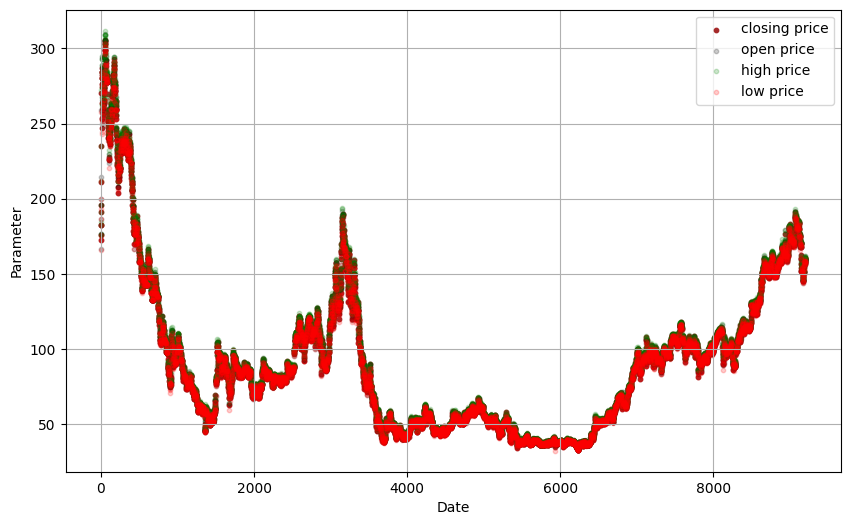

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(data['ID'],data['closing price'], color = 'brown', s = 10, label='closing price')
plt.scatter(data['ID'], data['open price'], color = 'black', s = 10, alpha = 0.2,label = 'open price')
plt.scatter(data['ID'], data['high price'], color = 'green', s = 10, alpha = 0.2, label = 'high price')
plt.scatter(data['ID'], data['low price'], color = 'red', s = 10, alpha = 0.2, label = 'low price')
plt.xlabel('Date')
plt.ylabel('Parameter')
plt.legend()
plt.grid()

#They clearly follow similar trends

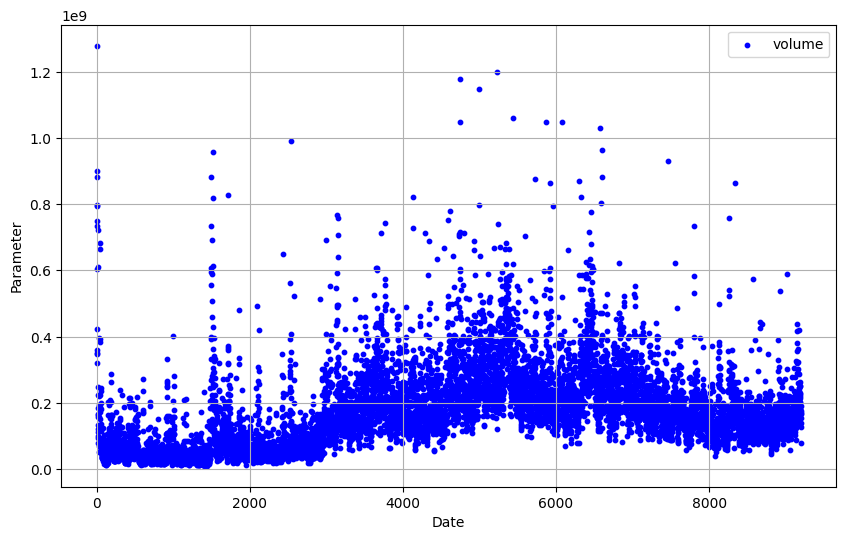

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(data['ID'], data['volume'], color = 'blue', s = 10, label = 'volume')
plt.xlabel('Date')
plt.ylabel('Parameter')
plt.legend()
plt.grid()

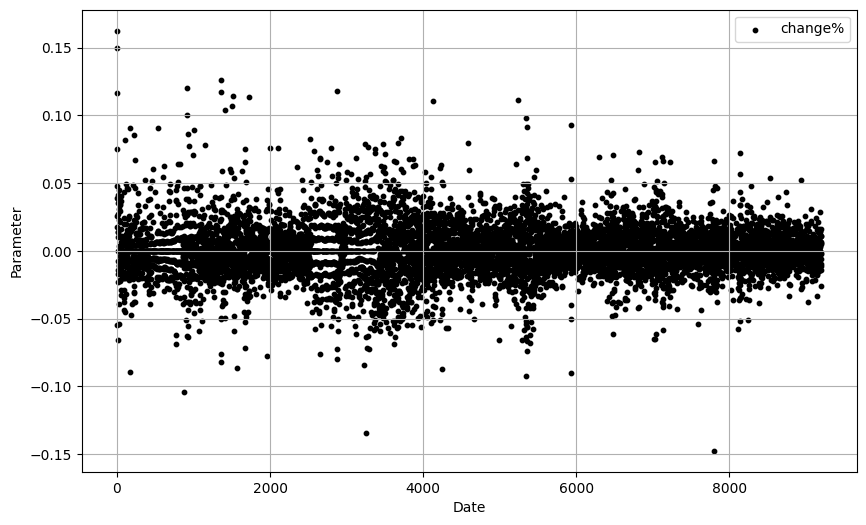

In [55]:
plt.figure(figsize=(10,6))
plt.scatter(data['ID'], data['change%'], color = 'black', s = 10, label = 'change%')
plt.xlabel('Date')
plt.ylabel('Parameter')
plt.legend()
plt.grid()